In [1]:
#z score - -3 to 3

In [2]:
import seaborn as sns
tips=sns.load_dataset('tips')

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
tips.shape

(244, 7)

In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


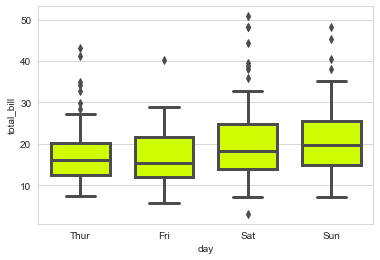

In [6]:
sns.set_style('whitegrid')

sns.boxplot(x='day',y='total_bill',data=tips,
            color='#cffc03',
            width=0.7,linewidth=3,
            whis=1,
            saturation=5)

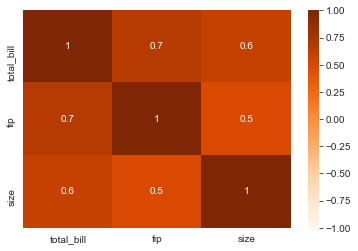

In [7]:
sns.heatmap(tips.corr(),annot=True,fmt='.1g',vmin=-1,
    vmax=1,center=0,
    cmap='Oranges')

In [8]:
tips.head(4)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2


In [9]:
tips['sex'].unique() #Female-0 #Male -1

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

In [10]:
tips['smoker'].unique() #No-0  #Yes -1

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [11]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

In [12]:
tips['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [14]:
tips['sex']=le.fit_transform(tips['sex'])

In [15]:
tips['smoker'] = le.fit_transform(tips['smoker'])
tips['day'] = le.fit_transform(tips['day'])
tips['time'] = le.fit_transform(tips['time'])

In [16]:
tips.head(25)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
5,25.29,4.71,1,0,2,0,4
6,8.77,2.00,1,0,2,0,2
7,26.88,3.12,1,0,2,0,4
8,15.04,1.96,1,0,2,0,2
9,14.78,3.23,1,0,2,0,2


In [17]:
#z score
from scipy import stats
import numpy as np
z=np.abs(stats.zscore(tips))

In [18]:
z

array([[3.14711305e-01, 1.43994695e+00, 1.34335316e+00, ...,
        2.79157595e-01, 6.21581561e-01, 6.00192629e-01],
       [1.06323531e+00, 9.69205340e-01, 7.44405889e-01, ...,
        2.79157595e-01, 6.21581561e-01, 4.53382921e-01],
       [1.37779900e-01, 3.63355539e-01, 7.44405889e-01, ...,
        2.79157595e-01, 6.21581561e-01, 4.53382921e-01],
       ...,
       [3.24629502e-01, 7.22971264e-01, 7.44405889e-01, ...,
        8.02024201e-01, 6.21581561e-01, 6.00192629e-01],
       [2.21286504e-01, 9.04025732e-01, 7.44405889e-01, ...,
        8.02024201e-01, 6.21581561e-01, 6.00192629e-01],
       [1.13228903e-01, 1.24660453e-03, 1.34335316e+00, ...,
        1.36033939e+00, 6.21581561e-01, 6.00192629e-01]])

In [19]:
#define some threshold to identify an outlier
threshold=3
np.where(z>threshold)

(array([ 23,  59, 125, 141, 143, 156, 156, 170, 170, 212, 212], dtype=int64),
 array([1, 0, 6, 6, 6, 0, 6, 0, 1, 0, 1], dtype=int64))

In [20]:
#first array represent the row observation or indexs
#second array represent the column labels

#in place of 23rd observation of 1st column we have outlier
z[59][0]

3.206165533519728

In [21]:
z[24][1]

0.13160582093834364

In [22]:
#to get cleaned data which is free from outliers will using variable again

df_no_outlier = tips[(z<3).all(axis=1)]
df_no_outlier

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,0,3
240,27.18,2.00,0,1,1,0,2
241,22.67,2.00,1,1,1,0,2
242,17.82,1.75,1,0,1,0,2


In [23]:
#using IQR
#25% 
q1 = tips.quantile(0.25)

In [24]:
q1

total_bill    13.3475
tip            2.0000
sex            0.0000
smoker         0.0000
day            1.0000
time           0.0000
size           2.0000
Name: 0.25, dtype: float64

In [25]:
#75%
q3=tips.quantile(0.75)

In [26]:
q3

total_bill    24.1275
tip            3.5625
sex            1.0000
smoker         1.0000
day            3.0000
time           1.0000
size           3.0000
Name: 0.75, dtype: float64

In [27]:
#
IQR = q3-q1

In [28]:
IQR

total_bill    10.7800
tip            1.5625
sex            1.0000
smoker         1.0000
day            2.0000
time           1.0000
size           1.0000
dtype: float64

In [29]:
#lower bound values
a=q1-1.5*IQR

In [30]:
a

total_bill   -2.82250
tip          -0.34375
sex          -1.50000
smoker       -1.50000
day          -2.00000
time         -1.50000
size          0.50000
dtype: float64

In [31]:
b=q3+1.5*IQR

In [32]:
b

total_bill    40.29750
tip            5.90625
sex            2.50000
smoker         2.50000
day            6.00000
time           2.50000
size           4.50000
dtype: float64

In [33]:
#getting proper outliers
(tips<(q1-1.5*IQR))|(tips>(q3+1.5*IQR))

,total_bill,tip,sex,smoker,day,time,size
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
239,False,True,False,False,False,False,False
240,False,False,False,False,False,False,False
241,False,False,False,False,False,False,False
242,False,False,False,False,False,False,False


In [34]:
iqr_clean=tips[~((tips<(q1-1.5*IQR))|(tips>(q3+1.5*IQR))).any(axis=1)]

In [35]:
iqr_clean

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
238,35.83,4.67,0,0,1,0,3
240,27.18,2.00,0,1,1,0,2
241,22.67,2.00,1,1,1,0,2
242,17.82,1.75,1,0,1,0,2
